In [73]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature, io, filters, measure, color, restoration
from skimage.morphology import watershed
from scipy import ndimage as ndi
import scipy
from skimage.restoration import denoise_tv_chambolle
import skimage
%matplotlib inline

In [74]:
def normalise(inData):
    """
    Normalise array.
    """
    inDataAbs = np.fabs(inData)
    inDataMax = np.amax(inData)
    normalisedData = inDataAbs/inDataMax
    return normalisedData

def entropy(A):
    """
    Calculate Shannon entropy of array.
    """
    pA = A/A.sum()
    return -np.sum(pA*np.log2(A))

In [75]:
imBW = io.imread("./data/H - 11(fld 07 wv Red - Cy5).tif")

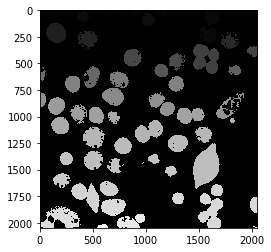

In [76]:
thresh = filters.threshold_otsu(imBW)
mask = imBW <= thresh
labeled = measure.label(mask, background=1)
plt.imshow(labeled, cmap="gray")

In [77]:
cells = ndi.find_objects(labeled)
for i in np.arange(len(cells))[::-1]:
    # Only get large cells
    if cells[i][1].stop - cells[i][1].start < 20 or cells[i][0].stop - cells[i][0].start < 20:
        del cells[i]
    # Only get square(ish) cells
    elif (cells[i][0].stop - cells[i][0].start) <= 0.8*(cells[i][1].stop - cells[i][1].start) \
            or (cells[i][1].stop - cells[i][1].start) <= 0.8*(cells[i][0].stop - cells[i][0].start):
        del cells[i]

4
1.17688


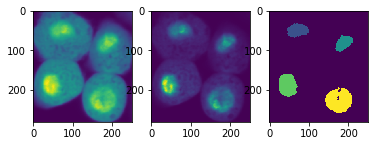

In [153]:
i=6
cell = skimage.exposure.adjust_sigmoid(imBW[cells[i]], cutoff=0.5, inv=False)#labeled[cells[i]]
thresh2 = filters.threshold_otsu(cell)
cellMask = cell <= thresh2
labels = measure.label(cellMask, background=1)
holes = ndi.find_objects(labels)
print(len(holes))
print(entropy(normalise(imBW[cells[i]])))
fig, ax = plt.subplots(1,3)
ax[0].imshow(imBW[cells[i]])#skimage.exposure.adjust_sigmoid(imBW[cells[i]], cutoff=0.1, inv=True))
ax[1].imshow(cell)
ax[2].imshow(labels)#skimage.exposure.adjust_sigmoid(imBW[cells[i]], cutoff=0.1, inv=True))

In [59]:
badCells = []
goodCells = []
# Run through each found cell and count objects in it
for i in np.arange(len(cells)):
    cell = labeled[cells[i]]
    thresh2 = filters.threshold_otsu(cell)
    cellMask = cell <= thresh2
    labels = measure.label(cellMask, background=0)
    holes = ndi.find_objects(labels)
    print(len(holes))
    print(entropy(normalise(imBW[cells[i]])))
    shannon = entropy(normalise(imBW[cells[i]]))

    if shannon >= 1.4:
        badCells.append(i)
    #if len(holes) >= 4:
    #    badCells.append(i)
    else:
        goodCells.append(i)

18
1.11488
6
1.11782
23
1.277
18
1.21963
7
1.1612
8
0.915529
15
1.29623
19
1.25289
4
0.866719
1
1.04158
10
1.03463
11
1.50838
3
1.20314
4
1.68296
11
1.13137
6
1.23684
8
1.33281
22
1.39212
15
1.29325
10
1.22443
6
1.29348
12
1.44154
2
0.956994
7
1.15953
7
1.26082
4
0.996167
11
1.19868
2
1.19589


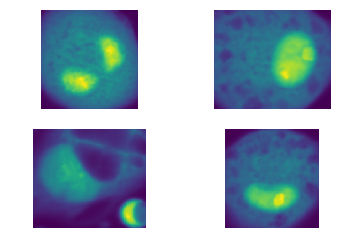

In [60]:
gridSize = 2
fig, ax = plt.subplots(gridSize, gridSize)
#plt.suptitle("Example data")
k = 0
for i in np.arange(0,gridSize/2,1):
    for j in np.arange(0,gridSize,1):
        k = k + 1
        ax[i,j].imshow(imBW[cells[goodCells[k]]])
        ax[i,j].axis("off")
k = 0
for i in np.arange(gridSize/2,gridSize,1):
    for j in np.arange(0,gridSize,1):
        k = k + 1
        ax[i,j].imshow(imBW[cells[badCells[k]]])
        ax[i,j].axis("off")